## TP3 : Logistic regression

The purpose of this tutorial is to implement and use the Logistic Regression for binary classification. We will apply this
method to the problem of handwritten characters to learn how to
distinguish two numbers (here 5 and 6).


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
#import numpy as np
#import matplotlib.pyplot as plt

from numpy import linalg as la
import pdb

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

## 1. Logistic regression, IRLS algorithm.

### Preliminary question: the algorithm

#### Have a look at the function `regression_logistique.m` and locate the main steps of the algorithm you have been taught (see course).
You can comment the code in the cell below.

In [2]:
def regression_logistique(X,t,Nitermax=20,eps_conv=1e-3, Lambda = 1e-3):
    '''Entrees :
    X = [ones(N_train,1) x_train];
    t = class_train 
    Nitermax = nombre maximale d'itérations (20 par défaut)
    eps_conv = critère de convergence sur norm(w-w_old)/norm(w) ; 
    eps_conv=1e-3 par défaut
    
    Sorties : 
    w : vecteur des coefficients de régression logistique
   Niter : nombre d'itérations utilisées effectivement
   
   Fonction de régression logistique pour la classification binaire.
   
   Utilisation :
       Nitermax = 50
       eps_conv = 1e-4
       [w,Niter] = regression_logistique(X,t,Nitermax,eps_conv)
    '''
    N_train = X.shape[0]

    #initialisation : 1 pas de l'algorithme IRLS
    w = np.zeros((X.shape[1],))
    w_old = w 
    y = 1/2*np.ones((N_train,))
    R = np.diag(y*(1-y)) + Lambda*np.identity(len(y)) # diag(y_n(1-y_n))
    z = X.dot(w_old)-la.inv(R).dot(y-t)
    
    w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)

    # boucle appliquant l'algortihme de Newton-Raphson
    Niter = 1
    while ( (la.norm(w-w_old)/la.norm(w)>eps_conv) | (Niter<Nitermax) ):
        Niter = Niter+1
        y = 1/(1+np.exp(-X.dot(w)))
        R = np.diag(y*(1-y))  
        w_old = w
        try:
            inv_R = la.inv(R+Lambda*np.identity(len(R)))
        except:
            inv_R = np.diag(1/(y*(1-y)+Lambda))
        z = X.dot(w_old)-inv_R .dot(y-t)
        w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)
         
    return w, Niter


On a rajouté un paramètre $\lambda_{inversion}$ pour rendre numériquement l'inversion possible

### Reading & preparing synthetic data

Load the training and test data sets `synth_train.txt`
and `synth_test.txt`. The targets t belong to {1,2} and the features  
x belong to R^2. 

We have 100 training samples and 200 test samples

* the 1st column contains the label of each sample, 
* columns 2 and 3 contain the coordinate of each point.

In [3]:
# Training set
synth_train = np.loadtxt('synth_train.txt') 
class_train = synth_train[:,0]
class_train_1 = np.where(synth_train[:,0]==1)[0]
class_train_2 = np.where(synth_train[:,0]==2)[0]
x_train = synth_train[:,1:]
N_train = np.size(x_train,axis=0)

# Test set
synth_test = np.loadtxt('synth_test.txt')
class_test = synth_test[:,0]
class_test_1 = np.where(synth_test[:,0]==1)[0]
class_test_2 = np.where(synth_test[:,0]==2)[0]
x_test = synth_test[:,1:]
N_test = np.size(x_test,axis=0)


### Preparing features for logistic regression (binary classification)
First, we prepare the feature matrix and the target vector associated to 
the training and test sets:


In [4]:
X = np.hstack((np.ones((N_train,1)),x_train))
t = 2-class_train   # 0 if class=2, 1 if class=1

X_test = np.hstack((np.ones((N_test,1)),x_test))
t_test = 2-class_test   # 0 if class=2, 1 if class=1

### Exercise 1 : the logistic function of decision

1. Use the function `regression_logistique.m` to estimate the logistic
regression vector `w`. *Indication : use `Nitermax = 50;
eps_conv=1e-3;`.*
2. Compute the decision function $f(x) = argmax_k P(C_k|x)$ on the test set
to get the classification results. Recall that $y_n=\sigma(w^T x)$ (logistic function)
and that *using vectors* you may directly write $y=\sigma(Xw)$, with the
column of ones in X.
3. Display the results by plotting the points from both the training set
and the test set.
4. Write the equation which defines the decision boundary.
5. Artificially add a few points to the training set far from the decision boundary to check the robustness of logistic regression to outliers. Check the behaviour of LDA for comparison in this case and comment. 


In [5]:
sigmoid = lambda x : 1/(1+np.exp(-x))
thread = lambda x: np.floor(2*x)

#Exercise 1
w, Niter = regression_logistique(X, t,Nitermax = 50,eps_conv=1e-3)

t_pred = thread(sigmoid(X_test@w))


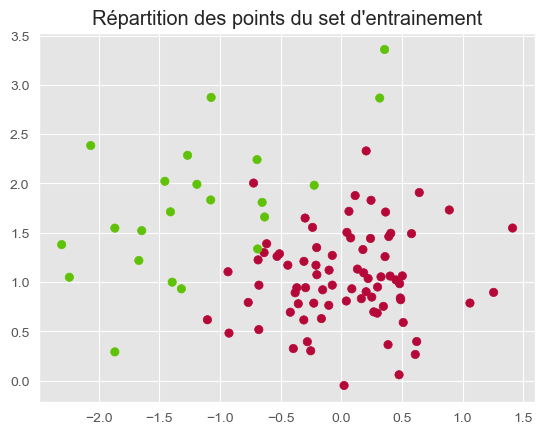

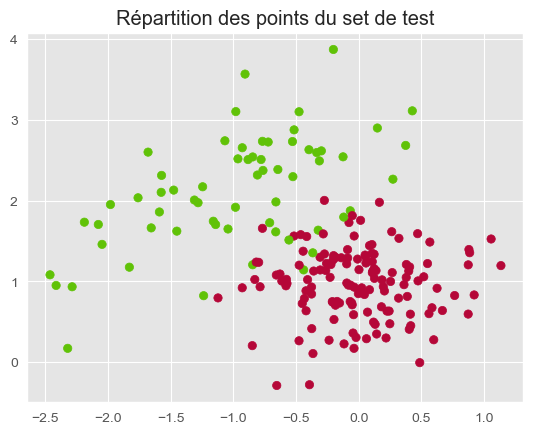

In [6]:
Color1 ,Color2= '#60C207','#B50738'
color_map = np.vectorize(lambda x: Color1 if x==1 else Color2)
plt.style.use('ggplot')
plt.figure()
plt.scatter(x_train[:,0],x_train[:,1],c=color_map(t))
plt.title("Répartition des points du set d'entrainement")
plt.show()
plt.figure()
plt.scatter(x_test[:,0],x_test[:,1],c=color_map(t_test))
plt.title("Répartition des points du set de test")
plt.show()

On remarque que certains points de la classe verte sont très éloignés de leur zone à plus haute densité. Cela peut causer des problèmes de classifications plus importants pour cette classe en particulier. En effet l'erreur va rester petite même si le classifieur classe mal ces points particuliers.
On voit aussi que les données sont presque linéairement séparables.

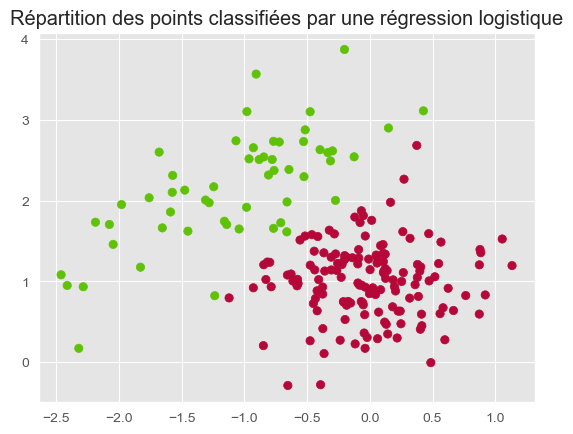

In [7]:
plt.figure()
plt.scatter(x_test[:,0],x_test[:,1],c=color_map(t_pred))
plt.title("Répartition des points classifiées par une régression logistique")
plt.show()

You can draw the decision boundary $w^Tx = 0$ by using: 


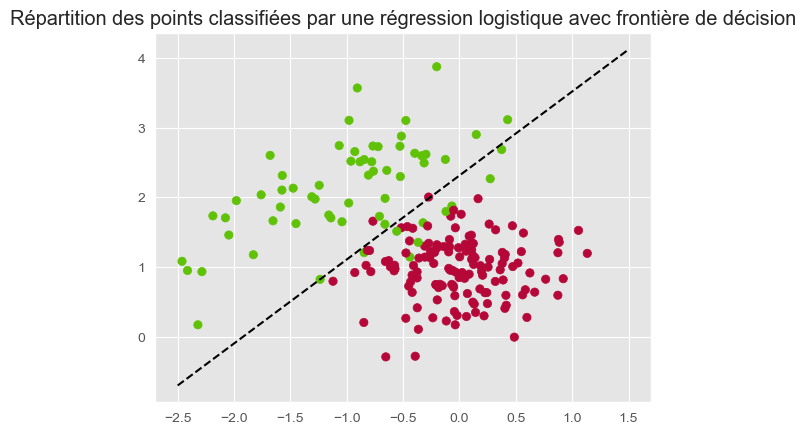

Part d'erreur dans la regression logistique pour le test : 5.5%
Matrice de confusion
 [[136   9]
 [  2  53]]


In [8]:
# First compute w... then: 
x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]
plt.plot(x1,x2,'k--')
plt.scatter(x_test[:,0],x_test[:,1],c=color_map(t_test))
plt.title("Répartition des points classifiées par une régression logistique avec frontière de décision")
plt.show()

Error_LR = 1-accuracy_score(t_pred,t_test)
print("Part d'erreur dans la regression logistique pour le test : "+str(round(Error_LR*100,2))+"%")

cM = confusion_matrix(t_pred,t_test)
print('Matrice de confusion\n',cM)

$w^Tx = 0 \Leftrightarrow w_0 + w_1x_1 + w_2x_2 = 0 \Leftrightarrow x_2 = -\dfrac{w_0}{w_2} - \dfrac{w_1}{w_2}x_1 $

In [9]:
a = -w[1]/w[2]
b = -w[0]/w[2]

print(f"L'équation de la droite est : y = {round(a,2)} x + {round(b,2)}")

L'équation de la droite est : y = 1.2 x + 2.31


**Impact du paramètre $\lambda_{inversion}$**

C:\Users\gener\AppData\Local\Temp\ipykernel_1012\3115687970.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x1,x2,'k--',label='lambda = '+str(Lambda+l*0.001),c=cmap(l))


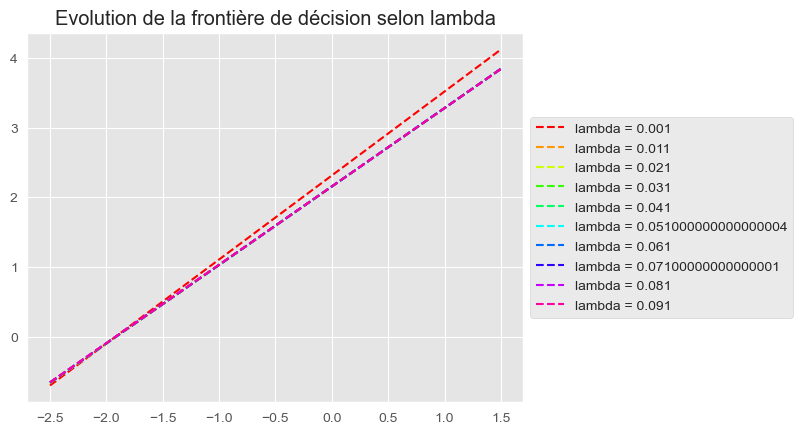

In [10]:
# Code get_cmap pris sur stackOverflow
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
cmap=get_cmap(100)
Lambda = 1e-3
plt.figure()
ax = plt.subplot(111)
plt.title('Evolution de la frontière de décision selon lambda')
for l in range(0,100,10):
    w, Niter = regression_logistique(X, t,Nitermax = 50,eps_conv=1e-3,Lambda=Lambda+l*0.001)
    x1 = np.linspace(-2.5,1.5,10)
    x2 = (-w[0]-w[1]*x1)/w[2]
    plt.plot(x1,x2,'k--',label='lambda = '+str(Lambda+l*0.001),c=cmap(l))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

On constate que la frontière de décision change avec la valeur de lambda (nous ne le montrons pas ici, mais le nombre d'itérations pour convergence reste le maximum autorisé à savoir 50 dans ce cas).
Le paramètre w change vu qu'à nombre d'itérations fixées, la convergence ne se fait pas à la même vitesse.

**Conclusion :**
L'ajout d'un paramètre $\lambda_{inversion}$ pour faire tourner l'algorithme est trop grossier.
Nous avons plusieurs solutions :
\
    - Ne pas mettre de lambda et arrêter l'algorithme dès que R n'est plus inversible.
    - Changer l'algorithme pour artificiellement permettre l'inversion de R : multiplier R puis diviser inv(R)
    - Optimiser l'algorithme pour éviter ce problème (peu être pas faisable)
    - Utiliser une fonction de régression plus aplatie pour éviter la mise à 0 dans les cas ou y-t est trop petit (ne résoud pas vraiment le problème)
    - Chercher un lambda optimal

Pour limiter la recherche nous allons nous contenter de trouver un $\lambda_{inversion}$ optimal

On note quand même que ce lambda correspond à l'ajout d'un terme de régularisation d'ordre 1 (type LASSO).


Text(0.5, 1.0, "Evolution de l'erreur du modèle selon Lambda")

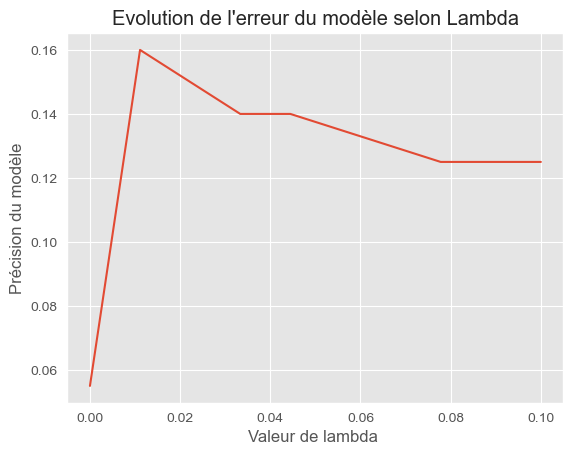

In [16]:
tabError=[]
Lambda = 1e-3
for l in range(0,100,10):
    w, Niter = regression_logistique(X, t,Nitermax = 50,eps_conv=1e-3,Lambda=Lambda+l*0.001)
    t_pred = thread(sigmoid(X_test@w))
    tabError.append(1-accuracy_score(t_pred,t_test))
plt.plot(np.linspace(0,0.1,10),tabError)
plt.xlabel("Valeur de lambda ")
plt.ylabel("Précision du modèle")
plt.title("Evolution de l'erreur du modèle selon Lambda")

Il semble que prendre lambda le plus petit possible minimise l'erreur.
Pour la suite du TP nous garderons : $\lambda_{inversion} = 10{-3}$

**Ajout de points éloignés de la frontière**

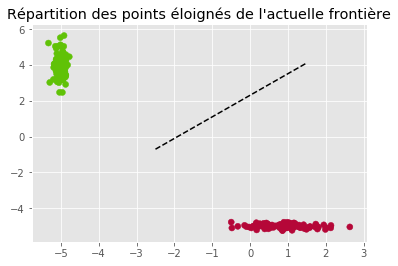

In [11]:
N_add_1,N_add_2 = 100,100
sigma_1 = (0.1,0.6)
sigma_2 = (0.7,0.1)

x_far_1 = np.array([-5,4]) + np.random.normal(scale=sigma_1,size=(N_add_1,2))
X_far_1 = np.hstack((np.ones((N_add_1,1)),x_far_1))
t_far_1 = np.ones((1,N_add_1))[0]

x_far_2 = np.array([1,-5]) + np.random.normal(scale=sigma_2,size=(N_add_2,2))
X_far_2 = np.hstack((np.ones((N_add_2,1)),x_far_2))
t_far_2 = np.zeros((1,N_add_2))[0]

x_far = np.concatenate([x_far_1,x_far_2])
X_far = np.concatenate([X_far_1,X_far_2])
t_far = np.concatenate([t_far_1,t_far_2])

x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]
plt.plot(x1,x2,'k--')
plt.scatter(x_far[:,0],x_far[:,1],c=color_map(t_far))
plt.title("Répartition des points éloignés de l'actuelle frontière")
plt.show()

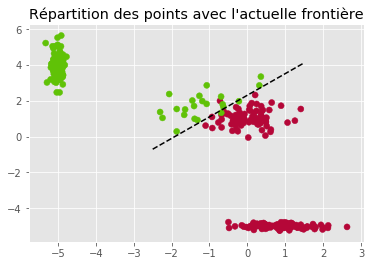

In [13]:
x_train_far = np.concatenate([x_train,x_far])
X_train_far = np.concatenate([X,X_far])
t_train_far = np.concatenate([t,t_far])

plt.plot(x1,x2,'k--')
plt.scatter(x_train_far[:,0],x_train_far[:,1],c=color_map(t_train_far))
plt.title("Répartition des points avec l'actuelle frontière")
plt.show()


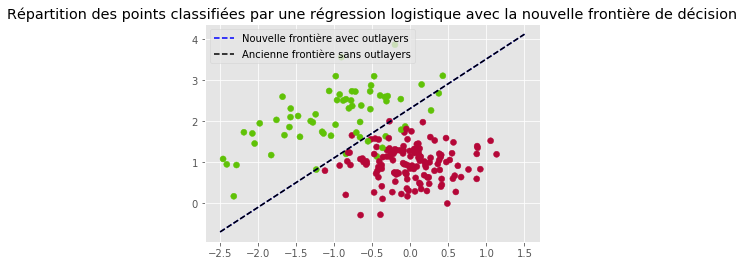

Part d'erreur dans la régression logistique (entrainée avec des outlayers) pour le test : 6.0%
Matrice de confusion
 [[136  10]
 [  2  52]]


In [14]:
w_far, Niter_far = regression_logistique(X_train_far, t_train_far,Nitermax = 50,eps_conv=1e-3,Lambda = 1e-5)
t_pred_far = thread(sigmoid(X_test@w_far))

x1 = np.linspace(-2.5,1.5,10) 
x2_far = (-w_far[0]-w_far[1]*x1)/w_far[2]
x2 = (-w[0]-w[1]*x1)/w[2]
plt.plot(x1,x2_far,'k--',color = "blue",label='Nouvelle frontière avec outlayers')
plt.plot(x1,x2,'k--',color = "black",label='Ancienne frontière sans outlayers')
plt.scatter(x_test[:,0],x_test[:,1],c=color_map(t_test))
plt.title("Répartition des points classifiées par une régression logistique avec la nouvelle frontière de décision")
plt.legend()
plt.show()

Error_Far = 1-accuracy_score(t_pred_far,t_test)
print("Part d'erreur dans la régression logistique (entrainée avec des outlayers) pour le test : "+str(round(Error_Far*100,2))+"%")

cM_far = confusion_matrix(t_pred_far,t_test)
print('Matrice de confusion\n',cM_far)

Les frontières de décisions sont quasiment les mêmes. Les droites sont confondues sur le schéma. On peut s'y attendre car c'est justement pour contrer l'effet négatif des outlayers sur la régression.

L'erreur n'est pas modifiée, c'est de 6% dans les deux cas et le nombre de points mal classés de chaque classe de change pas (vpoir matrice de confusion).

In [15]:
a = -w[1]/w[2]
b = -w[0]/w[2]

print(f"L'équation de l'ancienne droite est : y = {a} x + {b}")

a_far = -w_far[1]/w_far[2]
b_far = -w_far[0]/w_far[2]

print(f"L'équation de la nouvelle droite est : y = {a_far} x + {b_far}")

print(f"La différence des a : {np.abs(a-a_far)}")
print(f"La différence des b : {np.abs(b-b_far)}")



L'équation de l'ancienne droite est : y = 1.2066661668350693 x + 2.3172293429858866
L'équation de la nouvelle droite est : y = 1.206649662076811 x + 2.317201270181692
La différence des a : 1.6504758258317764e-05
La différence des b : 2.8072804194589907e-05


$\Rightarrow$ La différence entre les deux pente est de l'ordre de $10^{-5}$. Cela justifie bien l'efficacité de la régression logistique. 
Dans le cas d'un classifieur LDA (que l'on va voir en desssous) on s'attend à avoir un changement significatif des matrices de covariances $\Sigma$ et des vecteurs  $\mu$. 


## 1.1 LDA

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LinearClassifier = LinearDiscriminantAnalysis()
LinearClassifier.fit(X=x_train,y=t)
LinearClassifier_far = LinearDiscriminantAnalysis()
LinearClassifier_far.fit(X=x_train_far,y=t_train_far)


t_test_pred_linear = LinearClassifier.predict(x_test)
Error_Linear = 1-accuracy_score(t_test_pred_linear,t_test)

t_test_pred_linear_far = LinearClassifier_far.predict(x_test)
Error_Linear_far = 1-accuracy_score(t_test_pred_linear_far,t_test)

print("Part d'erreur dans la classification LDA sans outlayers pour le test : "+str(round(Error_Linear*100,4))+"%")
print("Part d'erreur dans la classification LDA avec outlayers pour le test : "+str(round(Error_Linear_far*100,4))+"%")


Part d'erreur dans la classification LDA sans outlayers pour le test : 5.5%
Part d'erreur dans la classification LDA avec outlayers pour le test : 27.0%


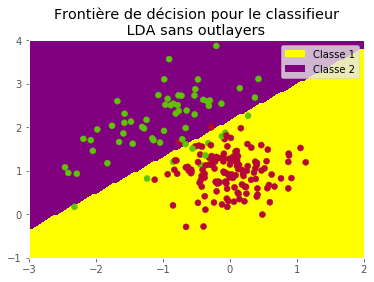

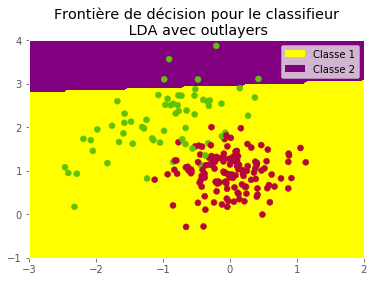

In [18]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-3,2,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-1,4,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)
x=np.vstack((X1.flatten('F'),X2.flatten('F'))).T

plt.figure()
CS = plt.contourf(x1,x2,np.rot90(LinearClassifier.predict(x).reshape(Nx1,Nx2),2),levels=1,origin="upper",colors=['yellow','purple'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in CS.collections]
plt.title("Frontière de décision pour le classifieur\n LDA sans outlayers ")
plt.legend(proxy,["Classe 1","Classe 2"])
plt.scatter(x_test[:,0],x_test[:,1],c=color_map(t_test))
plt.show()

plt.figure()
CS = plt.contourf(x1,x2,np.rot90(LinearClassifier_far.predict(x).reshape(Nx1,Nx2),2),levels=1,origin="upper",colors=['yellow','purple'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in CS.collections]
plt.title("Frontière de décision pour le classifieur\n LDA avec outlayers")
plt.legend(proxy,["Classe 1","Classe 2"])
plt.scatter(x_test[:,0],x_test[:,1],c=color_map(t_test))
plt.show()


Il est clair dans ce cas ( un peu extrême avec 200 outlayers clairement éloignés) que la frontière de décision est grandement impactée.
On en conclut que notre modèle de régression logistique est plus robuste face aux outlayers contrairement aux prédictions d'un modèle LDA.

## 2. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images 
of handwritten digits which are 5 and 6 here. Each line of the matrix
contains 256 pixel values coding for the gray level of a 16x16 image.

In [19]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples
train=np.concatenate([train_5,train_6])

### Examples of images


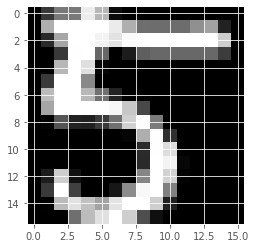

In [20]:
# Digit 5
n=9
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

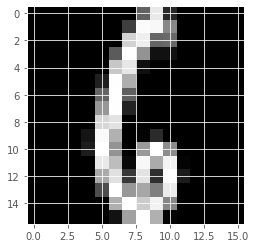

In [21]:
# Digit 6
n=5
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:


In [22]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0            # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
class_test = np.ones((len(train_5[145:,:])+len(train_6[200:,:]),1))
class_test[:len(train_5[145:,:])] = 0  
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## Exercise 2: logistic regression to classify 5 & 6

1. Note that pixel values are between -1 and 1 by using the functions
 `min(I(:))` and `max(I(:))`.
2. Identify the indices of the most significant pixels, which are defined 
as having a standard deviation greater than 0.5 here. We denote by `lis_sig`
the list of positions of these significant pixels in the image vector.
_Indication : the function `std` gives the standard deviation (columnwise
in matrices) and you should find 173 pixel positions.
3. Show a binary image to locate these pixels.
_Indication : `Isig = zeros(16); Isig(list_sig)=1; Isig=Isig';`._
4. Define the training set `x_train` from `x_train_brut` from the significant pixels only.
5. Do the same with `x_test_brut` to extract `x_test`.
6. Use `regression_logistique.m` to estimate the logistic regression vector
`w` from the training set `x_train`. 
Choose `Nitermax = 13; eps_conv = 1e-3;`
7. Compute the decision function and the labels of the test set `x_test`. 
_Indication : do not forget the column of ones !_
8. Estimate the classification error rate by using :
`erreur = sum(abs(class-class_test))/N_test;`.
9. Locate some misclassified examples and visualize the corresponding image.
Comment on your results and observations.


In [23]:
# Exercise 2


print(f"La valeur minimale de l'image est { np.min(I)}")
print(f"La valeur maximale de l'image est { np.max(I)}")

tabStd=np.std(train,axis=1) # donne la déviation standard sur chaque ligne donc pour chaque image de train_5 : array de taille 556
IndicesStd=np.argwhere(np.std(train,axis=0)>0.5).ravel() # donne la déviation standard sur chaque colonne donc pour chaque image de train_5 : array de taille 256 et on regarde la déviation >0.5

print(f"Avec le seuillage en écart type significatif, on réduit la dimension de l'image de 256 à {IndicesStd.shape[0]}")

La valeur minimale de l'image est -1.0
La valeur maximale de l'image est 1.0
Avec le seuillage en écart type significatif, on réduit la dimension de l'image de 256 à 174


Les valeurs des pixels sont entre -1 et 1 ce qui est normal puisque les pixels sont en nuances de noir et blanc.
On regarde ensuite pour chaque pixel sa décviation standard selon toutes les images du set. L'idée est de garder uniquement les pixels qui représentent le mieux les différences entre une image de 5 et de 6 donc avec une déviation supérieure à un seuil fixé.
On va faire varier ce seuil en l'augmentant pour voir les pixels les plus discriminant entre 5 et 6. Evidemment il faudra faire un compromis entre la qualité des pixels que l'on va regarder et le nombre que l'on veut utiliser pour garder une richesse dans notre modèle.

Text(0, 0.5, 'Nombre de pixel significatif')

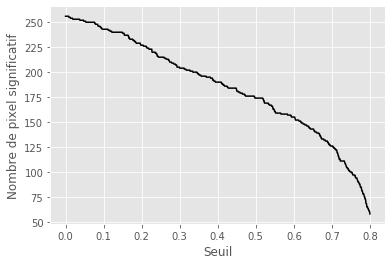

In [24]:
seuil = np.linspace(0,0.8,1000)
Nb_pixel_significatif_fonction=lambda x: np.sum(np.std(train,axis=0) > x)
Nb_pixel_significatif=[Nb_pixel_significatif_fonction(s) for s in seuil]
plt.plot(seuil,Nb_pixel_significatif,color='black')
plt.xlabel('Seuil')
plt.ylabel('Nombre de pixel significatif')

Le nombre de pixel significatif décroit en fonction du seuil (comme prévu). Cela montre que au départ il est inutile de garder tout les pixels car certains n'ont même pas une déviation supérieure à 0.1 (aucune différence quasiment entre 5 et 6 donc pas utile pour la régression).
--> C'est donc utile pour diminuer la dimension de notre problème.

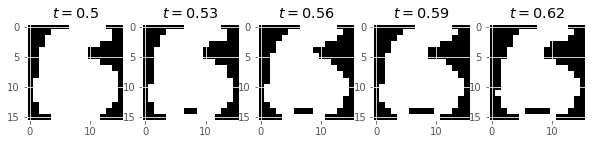

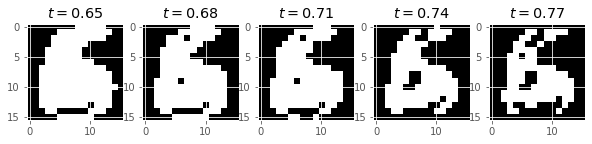

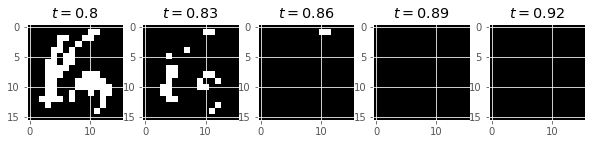

In [25]:
n = 15
n_per_line = 5
incr = 0.03
beg = 0.5
for i in range(n//n_per_line):
    plt.figure(figsize=(10,10))
    for j in range(n_per_line):
        threashold = beg + (j+i*n_per_line)*incr
        plt.subplot(1,n_per_line,j+1)
        plt.title(f"$t = {round(threashold,2)} $")
        plt.imshow((np.std(train,axis=0)>threashold).reshape((16,16)),cmap='gray')

Les pixels les plus significatifs sont ceux qui caractérise la forme du chiffre. Ainsi, on remarque que ce sont ceux qui décrivent un 6 (le 5 est contenu dans cette forme).
Dans le cas extrême ou le seuil vaut 0.86 on pert totalement l'information sur l'image et à priori garder aussi peu de pixels ne donnera pas un bon résultat.

In [45]:
sigmoid = lambda x : 1/(1+np.exp(-x))

def Logistic_reg(IndicesStd_seuillage,Nitermax=20,eps_conv=1e-3,Lambda = 1e-7):
    x_train = x_train_brut[:,IndicesStd_seuillage]
    x_test = x_test_brut[:,IndicesStd_seuillage]
    N_train=len(x_train)
    X_train_img = np.hstack((np.ones((N_train,1)),x_train))
    w, Niter = regression_logistique(X_train_img,class_train.ravel(),Nitermax,eps_conv,Lambda)
    X_test_img = np.hstack((np.ones((N_test,1)),x_test))

    return(w,Niter,X_test_img)

In [27]:
Indice_std = np.argwhere(np.std(train,axis=0)>0.5).ravel() #Le cas pour un seuil qui vaut 0.5.
w,Niter,X_test_img = Logistic_reg(Indice_std)
t_pred = sigmoid(X_test_img@w) >0.5

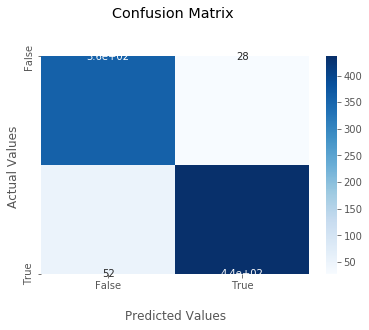

[[359  28]
 [ 52 436]]
La précision du modèle est de 0.9086


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cM = confusion_matrix(t_pred,class_test.ravel())

ax = sns.heatmap(cM, annot=True, cmap='Blues')

ax.set_title(f'Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
plt.show()

#On ne voit pas très bien donc on affiche le numpy array

print(cM)
print(f"La précision du modèle est de {round(accuracy_score(t_pred,class_test.ravel()),4)}")

Pour un seuillage à 0.5, la précision du modèle est déjà satisfaisante.
Ainsi sur les 256 en garder seulement 174 est déjà suffisante pour obtenir une précision de 90%.
On a :

   + un gain en complexité 
   + un modèle moins lourd en paramètres

## 2.1 Amélioration du modèle avec changement de seuillage 

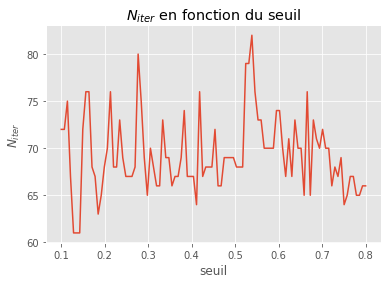

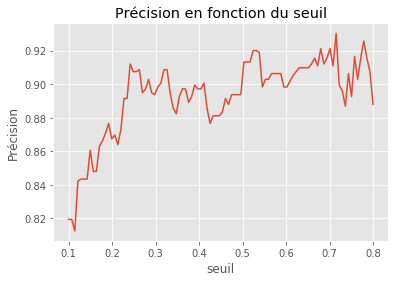

La meilleur précision du modèle est de 0.9302857142857143 pour un seuil de 0.7152 avec 70 itérations


In [87]:
from IPython.display import clear_output
seuil_test = np.linspace(0.1,0.8,100)
nb_seuil = len(seuil)
N_Iter_List, Accuracy = [],[]

for iter_,s in enumerate(seuil_test):
    Indice_std = np.argwhere(np.std(train,axis=0)>s).ravel()# donne la déviation standard sur chaque colonne donc pour chaque image de train_5 : array de taille 256 et on regarde la déviation >0.5
    w,Niter,X_test_img = Logistic_reg(Indice_std,Nitermax=40,eps_conv=1e-3,Lambda = 1e-12)
    t_pred = sigmoid(X_test_img@w) >0.5
    
    N_Iter_List.append(Niter)
    Accuracy.append(accuracy_score(t_pred,class_test.ravel()))
    print(f"Avancé du programme : {round(iter_/nb_seuil*100,2)} %")
    clear_output(wait=True)

plt.figure()
plt.plot(seuil_test,N_Iter_List)
plt.xlabel("seuil");plt.ylabel("$N_{iter}$")
plt.title("$N_{iter}$ en fonction du seuil")
plt.show()

plt.figure()
plt.plot(seuil_test,Accuracy)
plt.xlabel("seuil");plt.ylabel("Précision")
plt.title("Précision en fonction du seuil")
plt.show()



print(f"La meilleur précision du modèle est de {np.max(Accuracy)} pour un seuil de {round(seuil_test[np.argmax(Accuracy)],4)} avec {N_Iter_List[np.argmax(Accuracy)]} itérations")

Conclusion :  un seuil de 0.71 c'est à dire à peu près 110 pixels utilisés seulement ( mais bien choisis) permet d'avoir une bonne précision sur notre classification pour "pas trop cher".

In [88]:
#On travaille maintenant avec le modèle le plus performant
Indice_std = np.argwhere(np.std(train,axis=0)>seuil_test[np.argmax(Accuracy)]).ravel()# donne la déviation standard sur chaque colonne donc pour chaque image de train_5 : array de taille 256 et on regarde la déviation >0.5
w,Niter,X_test_img = Logistic_reg(Indice_std,Nitermax=40,eps_conv=1e-3,Lambda = 1e-12)
t_pred = sigmoid(X_test_img@w) >0.5
cM = confusion_matrix(t_pred,class_test.ravel())
print(f"Précision : {accuracy_score(t_pred,class_test.ravel())}" )
print(cM)

Précision : 0.9302857142857143
[[370  20]
 [ 41 444]]


Text(0.5, 1.0, 'Précision en fonction $\\epsilon_{conv}$ ')

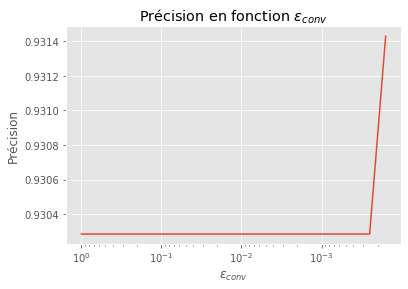

In [83]:
Indice_std = np.argwhere(np.std(train,axis=0)>seuil_test[np.argmax(Accuracy)]).ravel()# donne la déviation standard sur chaque colonne donc pour chaque image de train_5 : array de taille 256 et on regarde la déviation >0.5
Accuracy_seuil_fixe =[]
Eps_conv =  1/np.logspace(0,3.8,20)
for eps in Eps_conv:
    w,Niter,X_test_img = Logistic_reg(Indice_std,Nitermax=40,eps_conv=eps,Lambda = 1e-12)
    t_pred = sigmoid(X_test_img@w) >0.5
    Accuracy_seuil_fixe.append(accuracy_score(t_pred,class_test.ravel()) )
plt.plot(Eps_conv,Accuracy_seuil_fixe)
plt.xlabel("$\epsilon_{conv}$")
plt.ylabel("Précision")
plt.gca().invert_xaxis()
plt.xscale('log')


plt.title("Précision en fonction $\epsilon_{conv}$ ")

$\epsilon_{conv}$ ne joue pas un fort rôle ici pour la convergence de l'algo. Néanmoins, on voit que notre précision augmente pour $\epsilon_{conv} = 10^{3.8}$

Text(0.5, 1.0, 'Précision en fonction $\\lambda_{inversion}$ ')

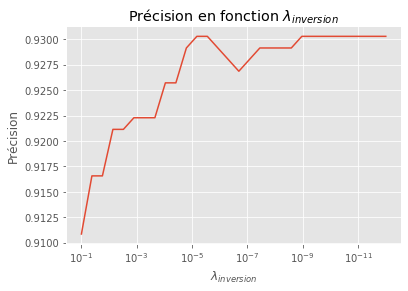

In [86]:
Indice_std = np.argwhere(np.std(train,axis=0)>seuil_test[np.argmax(Accuracy)]).ravel()# donne la déviation standard sur chaque colonne donc pour chaque image de train_5 : array de taille 256 et on regarde la déviation >0.5
Accuracy_seuil_fixe =[]
Lambda_list =  1/np.logspace(1,12,30)
for l in Lambda_list:
    w,Niter,X_test_img = Logistic_reg(Indice_std,Nitermax=40,eps_conv=1e-3,Lambda = l)
    t_pred = sigmoid(X_test_img@w) >0.5
    Accuracy_seuil_fixe.append(accuracy_score(t_pred,class_test.ravel()) )
plt.plot(Lambda_list,Accuracy_seuil_fixe)
plt.xlabel("$\lambda_{inversion}$")
plt.ylabel("Précision")
plt.gca().invert_xaxis()
plt.xscale('log')


plt.title("Précision en fonction $\lambda_{inversion}$ ")
plt.show()

Le paramètre $\lambda_{inversion}$ joue un rôle significatif. Si on le prend trop grand, on rajoute un trop fort terme dans l'inversion de la matrice est l'influence est forte.

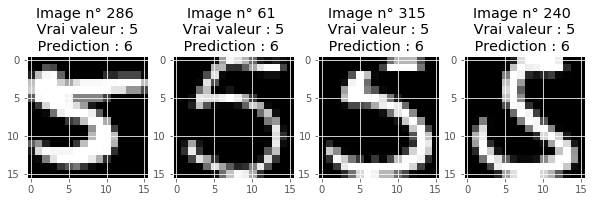

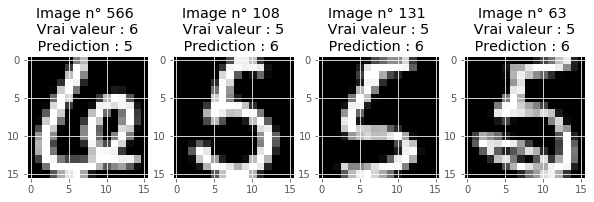

In [31]:
Nb_images = 8
n_image_per_line = 4

list_images_mauvaise_classe = np.argwhere(t_pred!=class_test.ravel()).ravel()
list_images = np.random.choice(list_images_mauvaise_classe, Nb_images)

for i in range(Nb_images//n_image_per_line):
    plt.figure(figsize=(10,10))
    for j in range(n_image_per_line):
        plt.subplot(1,n_image_per_line,j+1)
        numero_image = list_images[i*n_image_per_line+j]
        plt.title(f"Image n° {numero_image} \n Vrai valeur : {int(class_test.ravel()[numero_image]+5)} \n Prediction : {int(t_pred[numero_image]+5)}  ")
        plt.imshow(x_test_brut[numero_image,:].reshape((16,16)),cmap='gray')



Les chiffres qu'on affiche ont en effet des défauts qui sont pris en compte en dans les pixels significatifs et des spécificités qui ne sont pas pris dans les pixels significatifs. 

Ainsi, l'algorithme peut avoir du mal à distinguer la différence entre les chiffres. On pourrait utiliser plusieurs modèles avec différents seuils pour peut être améliorer le modèle (cf Ensemble methods). De plus, on étudie pas les formes dans leurs globilités. Ainsi, des modèles CNN seraient plus adapté à ce type de problème pour distinguer les formes dans leurs globalités (cf cours deep learning).

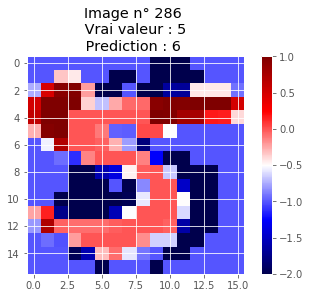

In [36]:
numero_image = 286
plt.title(f"Image n° {numero_image} \n Vrai valeur : {int(class_test.ravel()[numero_image]+5)} \n Prediction : {int(t_pred[numero_image]+5)}  ")
plt.imshow(x_test_brut[numero_image,:].reshape((16,16))-(np.std(train,axis=0)>seuil_test[np.argmax(Accuracy)]).reshape((16,16)),cmap='seismic')
plt.colorbar()

En rouge foncé sont représentés les pixels qui ne sont pas pris en compte dans l'algo seuillé  et qui sont pourtant important dans le 5.

## 3. Logistic regression using `scikit-learn`

1. **Go to** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for a presentation of the logistic regression model in `scikit-learn`.

2. **Apply** it to the present data set.

3. **Comment** on the use of logistic regression.

*Indication : you may have a look at* 

a) Theory : http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex5/ex5.html

b) Video :  https://www.coursera.org/learn/machine-learning/lecture/4BHEy/regularized-logistic-regression 

c) Example : http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

*for a short presentation of regularized logistic regression.*

In [90]:
# Include your code here
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)


x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0            # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
class_test = np.ones((len(train_5[145:,:])+len(train_6[200:,:]),1))
class_test[:len(train_5[145:,:])] = 0  
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

X_train_img = np.hstack((np.ones((N_train,1)),x_train_brut))
X_test_img = np.hstack((np.ones((N_test,1)),x_test_brut))

lr.fit(X_train_img,class_train.ravel())
t_pred_sklearn = lr.predict(X_test_img)



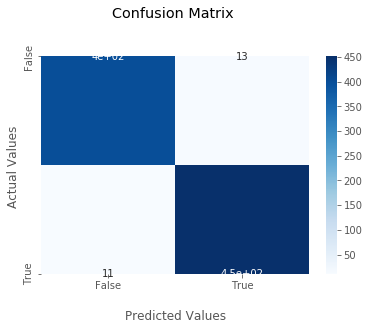

[[400  13]
 [ 11 451]]
La précision du modèle est de 0.9725714285714285


In [91]:
cM = confusion_matrix(t_pred_sklearn,class_test.ravel())

ax = sns.heatmap(cM, annot=True, cmap='Blues')

ax.set_title(f'Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
plt.show()

#On ne voit pas très bien donc on affiche le numpy array

print(cM)
print(f"La précision du modèle est de {accuracy_score(t_pred_sklearn,class_test.ravel())}")

Commentaires :

Sans seuillage et avec sklearn, le modèle est beaucoup plus performant. Ils utilisent un algorithme qui converge mieux que la méthode de Newton Raphson. 

Le lien de la vidéo ne fonctionne plus.